## Regression Analysis

In [1]:
# Basic libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("CarPrice_Assignment.csv")

# Show first 5 rows
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
# Shape & columns
print("Shape:", df.shape)
print("\nColumns:\n", df.columns)

# Summary statistics
df.describe(include="all").T

# Missing values
print("\nMissing values:\n", df.isnull().sum())

Shape: (205, 26)

Columns:
 Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

Missing values:
 car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg       

In [4]:
# Drop duplicates if any
df = df.drop_duplicates()

# Handle categorical features
df = pd.get_dummies(df, drop_first=True)

# Check new shape
print("After encoding:", df.shape)

After encoding: (205, 191)


In [5]:
# Target = Selling Price (adjust name if your dataset uses 'price')
target = "price"

X = df.drop(columns=[target])
y = df[target]

# Train-Test Split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

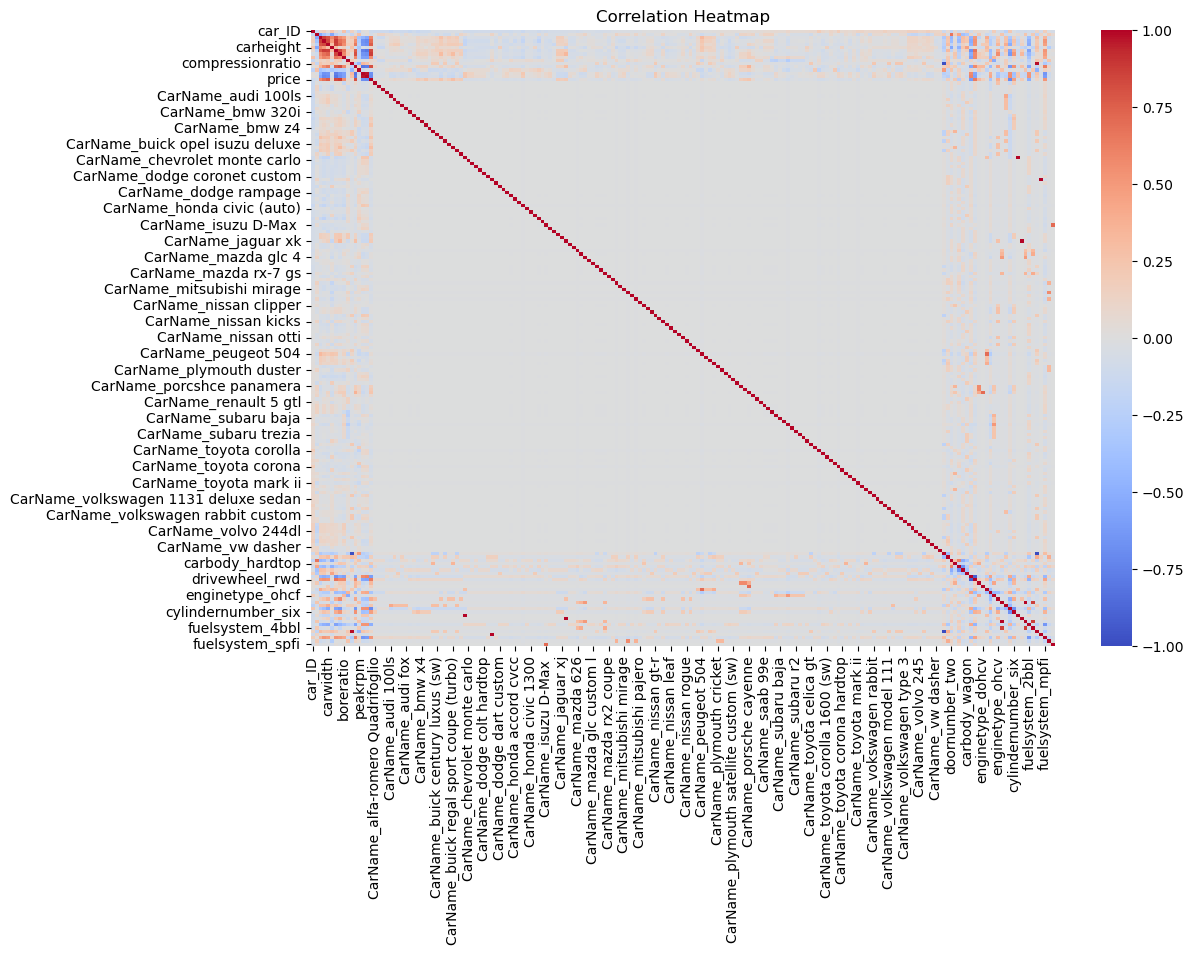

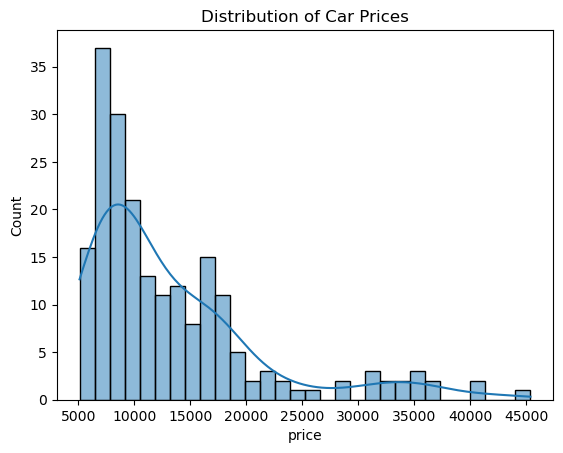

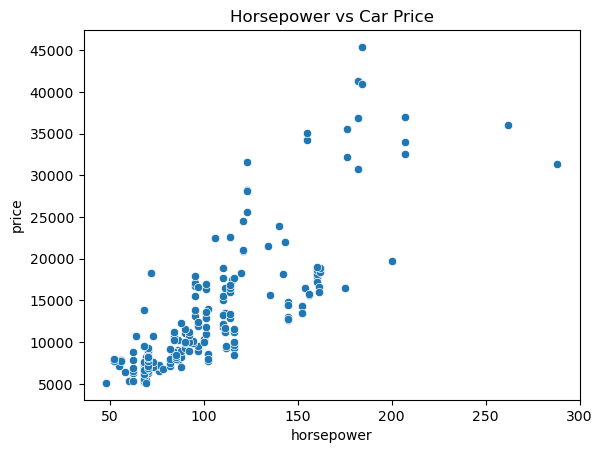

In [6]:
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

# Distribution of target
sns.histplot(df[target], bins=30, kde=True)
plt.title("Distribution of Car Prices")
plt.show()

# Scatterplots of key features
sns.scatterplot(x=df["horsepower"], y=df[target])
plt.title("Horsepower vs Car Price")
plt.show()

In [7]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_lin = lin_reg.predict(X_test)

In [8]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

In [10]:
def evaluate_model(name, y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} -> RMSE: {rmse:.2f}, R2: {r2:.3f}")

evaluate_model("Linear Regression", y_test, y_pred_lin)
evaluate_model("Random Forest", y_test, y_pred_rf)

Linear Regression -> RMSE: 13295.12, R2: -1.239
Random Forest -> RMSE: 1911.18, R2: 0.954


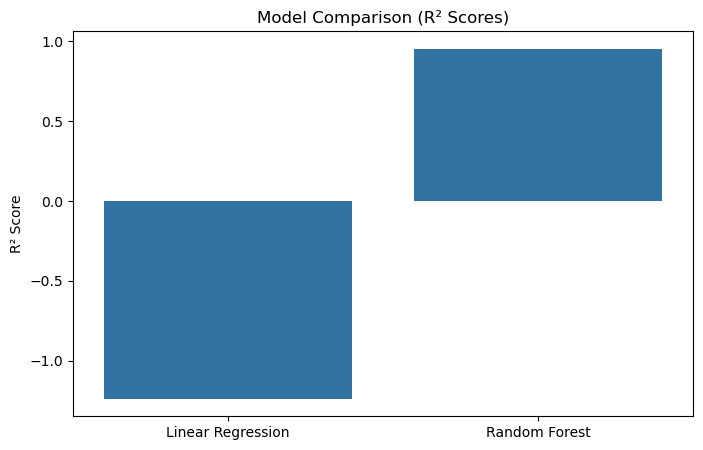

In [11]:
models = ["Linear Regression", "Random Forest"]
r2_scores = [
    r2_score(y_test, y_pred_lin),
    r2_score(y_test, y_pred_rf)
]

plt.figure(figsize=(8,5))
sns.barplot(x=models, y=r2_scores)
plt.title("Model Comparison (R² Scores)")
plt.ylabel("R² Score")
plt.show()

## Task Is Done